In [89]:
import csv
import pandas as pd
import scipy 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib as mpl
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import warnings

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix

# import warnings
# warnings.filterwarnings('ignore')

In [48]:
data = pd.read_csv("aa_final_full.csv")
cols = data.columns
data

,YEAR,NAME_2,YRMO,ID_1,ID_2,NAME_1,TEMP,RAIN,ACTION_ANY,Maize,Millet,Rice,Sorghum,biomass
0,1990,Bakel,199008,12,36,Tambacounda,28.200000,19.888333,0,NaN,NaN,NaN,NaN,NaN
1,1990,Bakel,199009,12,36,Tambacounda,28.383334,14.330000,0,NaN,NaN,NaN,NaN,NaN
2,1990,Bakel,199010,12,36,Tambacounda,30.116667,3.335000,0,NaN,NaN,NaN,NaN,NaN
3,1990,Bakel,199011,12,36,Tambacounda,28.333333,0.310000,0,NaN,NaN,NaN,NaN,NaN
4,1990,Bakel,199012,12,36,Tambacounda,26.283333,0.093333,0,NaN,NaN,NaN,NaN,NaN
5,1990,Bignona,199008,14,43,Ziguinchor,26.875000,59.349999,0,NaN,NaN,NaN,NaN,NaN
6,1990,Bignona,199009,14,43,Ziguinchor,27.325000,18.730000,0,NaN,NaN,NaN,NaN,NaN
7,1990,Bignona,199010,14,43,Ziguinchor,27.750000,6.845000,0,NaN,NaN,NaN,NaN,NaN
8,1990,Bignona,199011,14,43,Ziguinchor,26.700000,0.180000,0,NaN,NaN,NaN,NaN,NaN
9,1990,Bignona,199012,14,43,Ziguinchor,25.025000,0.015000,0,NaN,NaN,NaN,NaN,NaN


In [3]:
cols = ['ACTION_ANY','TEMP', 'RAIN', 'Maize', 'Millet', 'Rice', 'Sorghum', 'biomass']
col = "TEMP"
main_data = data[cols]


# Pair Plots for Factors vs Conflicts


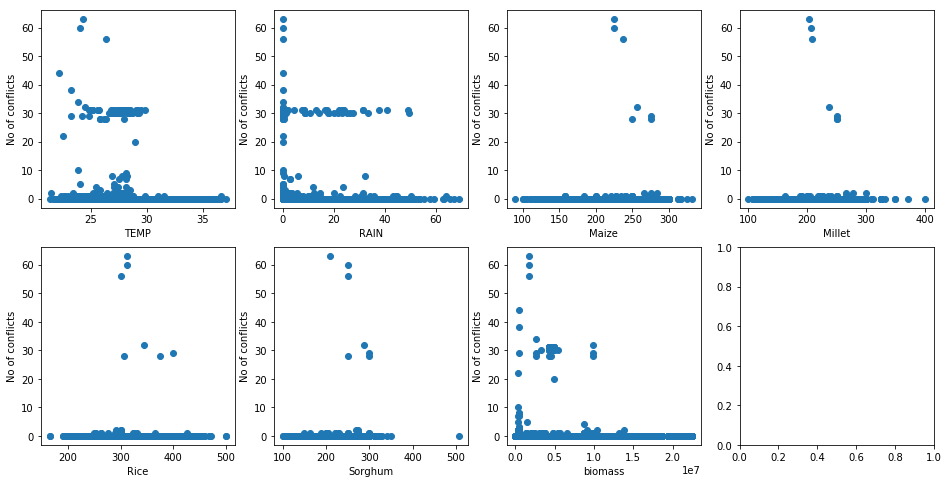

In [4]:
fig, ax = plt.subplots(2,4,figsize=(16, 8))
for i in range(len(cols)):
    if (cols[i] != 'ACTION_ANY'):
        temp_data = main_data[['ACTION_ANY',cols[i]]].dropna()
        ax[int((i-1)/4), int((i-1)%4)].scatter( temp_data[cols[i]],temp_data['ACTION_ANY'], label=cols[i])
        ax[int((i-1)/4), int((i-1)%4)].set_xlabel(cols[i])
        ax[int((i-1)/4), int((i-1)%4)].set_ylabel("No of conflicts")
fig.savefig('irispairplot.png')
plt.show()


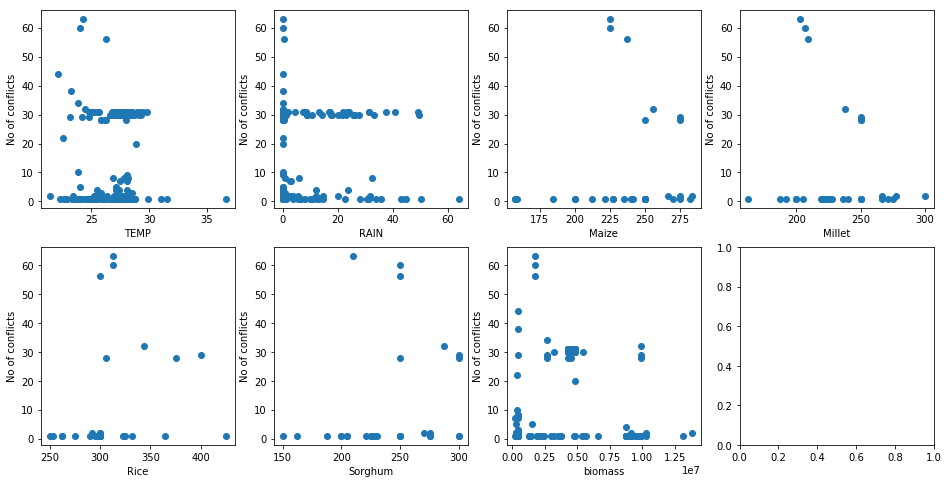

In [5]:
fig, ax = plt.subplots(2,4,figsize=(16, 8))
for i in range(len(cols)):
    if (cols[i] != 'ACTION_ANY'):
        temp_data = main_data[['ACTION_ANY',cols[i]]].dropna()
        temp_data = temp_data[temp_data['ACTION_ANY'] !=  0]
        ax[int((i-1)/4), int((i-1)%4)].scatter( temp_data[cols[i]],temp_data['ACTION_ANY'], label=cols[i])
        ax[int((i-1)/4), int((i-1)%4)].set_xlabel(cols[i])
        ax[int((i-1)/4), int((i-1)%4)].set_ylabel("No of conflicts")
fig.savefig('irispairplot.png')
plt.show()

## Modeling

###  Linear Regression

#### Model including Temperature and Rainfall (Including no conflict)

In [1]:
model_1 = main_data[["ACTION_ANY", "TEMP", "RAIN"]].dropna()
X_train, X_test, y_train, y_test = train_test_split(model_1[["TEMP", "RAIN"]], model_1["ACTION_ANY"], test_size=0.33, random_state=42)


pipe = make_pipeline(
        StandardScaler(),
        LinearRegression()) 

model_1_lr = pipe.fit(X_train,y_train)
model_1_lr.score(X_test,y_test)

0.03548642145866842

#### Model including Temperature and Rainfall (Excluding no conflict)

In [8]:
model_1 = main_data[main_data["ACTION_ANY"] != 0][["ACTION_ANY", "TEMP", "RAIN"]].dropna()
X_train, X_test, y_train, y_test = train_test_split(model_1[["TEMP", "RAIN"]], model_1["ACTION_ANY"], test_size=0.33, random_state=42)


pipe = make_pipeline(
        StandardScaler(),
        LinearRegression()) 

model_1_lr = pipe.fit(X_train,y_train)
model_1_lr.score(X_test,y_test)

-0.02959765734922626

#### Model with all Factors (Including no conflict)

In [9]:
model_2 = main_data.dropna()
X_train, X_test, y_train, y_test = train_test_split(model_2[['TEMP', 'RAIN', 'Maize', 'Millet', 'Rice', 'Sorghum', 'biomass']],
                                                    model_2["ACTION_ANY"], test_size=0.33)

pipe = make_pipeline(
        StandardScaler(),
        LinearRegression()) 

model_2_lr = pipe.fit(X_train,y_train)
model_2_lr.score(X_test,y_test)

0.05310182385888795

#### Model with all Factors (Excluding no conflict)

In [10]:
model_2 = main_data[main_data["ACTION_ANY"] != 0][cols].dropna()
X_train, X_test, y_train, y_test = train_test_split(model_2[['TEMP', 'RAIN', 'Maize', 'Millet', 'Rice', 'Sorghum', 'biomass']],
                                                    model_2["ACTION_ANY"], test_size=0.33, random_state =  1)

pipe = make_pipeline(
        StandardScaler(),
        LinearRegression()) 

model_2_lr = pipe.fit(X_train,y_train)
model_2_lr.score(X_test,y_test)

0.03253649054704677

As we can see, the Linear Regression Model Fails horribly.

### Logistic regression 

In [12]:
main_data["Action"] = [1 if conf > 0 else 0 for conf in main_data["ACTION_ANY"]]


C:\Users\ameya\AppData\Local\conda\conda\envs\coms007\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
model_3 = main_data.dropna()

X_train, X_test, y_train, y_test = train_test_split(model_3[['TEMP', 'RAIN', 'Maize', 'Millet', 'Rice', 'Sorghum', 'biomass']],
                                                    model_3["Action"], test_size=0.33, stratify = model_3["Action"], random_state = 42)

pipe = make_pipeline(
        StandardScaler(),
        LogisticRegression()) 

model_3_lr = pipe.fit(X_train,y_train)
y_pred = model_3_lr.predict(X_test)
model_3_lr.score(X_test,y_test)

C:\Users\ameya\AppData\Local\conda\conda\envs\coms007\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9824561403508771

This Logistic Regression is not accurate due to class imbalance. Let us us balanced data

In [27]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(replacement=False)
X_train_subsample, y_train_subsample = rus.fit_sample(
    X_train, y_train)
print(X_train.shape)
print(X_train_subsample.shape)
print(np.bincount(y_train_subsample))

(1041, 7)
(36, 7)
[18 18]


In [28]:
X_test.shape

(513, 7)

In [29]:
param_grid = {"logisticregression__C": [0.0001, 0.0005,0.001, 0.005, 0.01, 0.1, 1, 10, 100],}


grid = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        LogisticRegression(solver = 'lbfgs')),
    param_grid=param_grid, cv=10)

In [30]:
grid_model = grid.fit(X_train_subsample,y_train_subsample)
print(grid_model.best_params_)
print(grid_model.best_score_)


{'logisticregression__C': 0.1}
0.6944444444444444


C:\Users\ameya\AppData\Local\conda\conda\envs\coms007\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
pipe1 = make_pipeline(
        StandardScaler(),
        LogisticRegression(C = grid_model.best_params_['logisticregression__C'])) 


model_4_lr = pipe1.fit(X_train_subsample,y_train_subsample)
print(model_4_lr.score(X_test,y_test))
y_pred = model_4_lr.predict(X_test)
model_4_lr.named_steps["logisticregression"].coef_[0]

0.6764132553606238


C:\Users\ameya\AppData\Local\conda\conda\envs\coms007\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([-0.27019441, -0.10336183,  0.20595237,  0.11598872,  0.21886945,
        0.00566754,  0.03375023])

<BarContainer object of 12 artists>

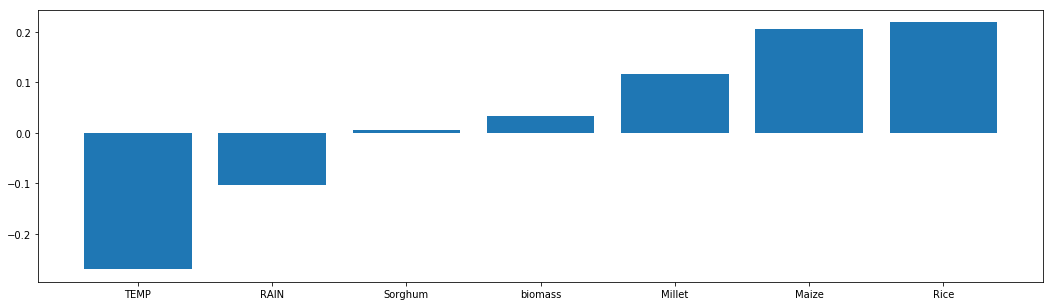

In [37]:
predictors = ['TEMP', 'RAIN', 'Maize', 'Millet', 'Rice', 'Sorghum', 'biomass']
d = {'features': predictors, 'value': model_4_lr.named_steps["logisticregression"].coef_[0]}
coefficients = pd.DataFrame(data= d)
weights = coefficients.sort_values(by=['value'], ascending=True)[1:10]
weights = weights.append(coefficients.sort_values(by=['value'], ascending=False)[1:10])
weights["sign"] = [1 if i > 0 else 0 for i in weights['value']]
weights = weights.sort_values(by=['value'])
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 5)
colours  = ['red', 'blue']
plt.bar(x = weights["features"], height = weights["value"] )


As expected, high prices correlate with the conflict incidents. Surprisigly, Temperature is negatively correlated
with conflicts, which went against our hypothesis. a possible explaination for this is maybe that the effects of
temperature on conflict have a lag with respect to time

In [19]:
confusion_matrix(y_test, y_pred)

array([[317, 187],
       [  0,   9]], dtype=int64)

### Support Vector Machines

In [39]:
param_grid = {"svc__C": [0.0001, 0.0005,0.001, 0.005, 0.01, 0.1, 1, 10, 100],
             "svc__gamma": [0.0001, 0.0005,0.001, 0.005, 0.01, 0.1, 1, 10, 100]}


grid = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        SVC()),
    param_grid=param_grid, cv=10)

In [40]:
grid_model = grid.fit(X_train_subsample,y_train_subsample)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'svc__C': 0.0001, 'svc__gamma': 0.0001}
0.7222222222222222


C:\Users\ameya\AppData\Local\conda\conda\envs\coms007\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
pipe2 = make_pipeline(
        StandardScaler(),
        SVC(C = grid_model.best_params_['svc__C'], gamma = grid_model.best_params_['svc__gamma']))


model_5_lr = pipe2.fit(X_train_subsample,y_train_subsample)
print(model_5_lr.score(X_test,y_test))
y_pred = model_5_lr.predict(X_test)
confusion_matrix(y_test, y_pred)

0.7485380116959064


array([[375, 129],
       [  0,   9]], dtype=int64)

### Decision Trees


In [43]:

pipe3 = make_pipeline(
        StandardScaler(),
        DecisionTreeClassifier())


model_6_lr = pipe3.fit(X_train_subsample,y_train_subsample)
print(model_6_lr.score(X_test,y_test))
y_pred = model_6_lr.predict(X_test)
confusion_matrix(y_test, y_pred)

0.7777777777777778


array([[391, 113],
       [  1,   8]], dtype=int64)

### Time Series Classification 

In [93]:
cols2 = ['YRMO', 'ACTION_ANY','TEMP', 'RAIN', 'Maize', 'Millet', 'Rice', 'Sorghum', 'biomass']
tsdata = data[data["NAME_2"] == "Bignona"][data["YEAR"] >= 2007][cols2]
tsdata["Action"] = [1 if conf > 0 else -1 for conf in tsdata["ACTION_ANY"]]
tsdata = tsdata.fillna(method='ffill').sort_values(by=['YRMO'])
tsdata["Date_Time"] = pd.to_datetime(tsdata.YRMO, format = '%Y%m')
tsdata.index = tsdata.Date_Time
train = tsdata[:int(0.7*(len(tsdata)))]
valid = tsdata[int(0.7*(len(tsdata))):]
excog_cols = ['TEMP', 'RAIN', 'Maize', 'Millet', 'Rice', 'Sorghum']

In [94]:
from statsmodels.tsa.arima_model import ARMA
warnings.filterwarnings('ignore')

model = ARMA(train["Action"],exog=train[excog_cols], order=(5, 1))
model_fit = model.fit(disp=False)
pred = model_fit.predict("2012-08-01", "2015-01-01", exog=valid[excog_cols])


In [114]:
tsd2 = data[data["NAME_2"] == "Dakar"][data["YEAR"] >= 2007][cols2].sort_values(by=['YRMO'])
tsd2["Action"] = [1 if conf > 0 else 0 for conf in tsd2["ACTION_ANY"]]

In [984]:
tsd2 = data[data["NAME_2"] == "Bignona"][data["YEAR"] >= 2007][cols2].sort_values(by=['YRMO'])
tsd2["Action"] = [1 if conf > 0 else 0 for conf in tsd2["ACTION_ANY"]]

tsd2
for i in excog_cols:
    tsd2[i + "-1"] = tsd2[i].shift(1)
    tsd2[i + "-2"] = tsd2[i].shift(2)
main_ts = tsd2.dropna()
list(main_ts)
tsc = ['TEMP', 'RAIN', 'Maize', 'Millet', 'Rice', 'Sorghum', 'biomass', 'TEMP-1', 'TEMP-2',  'RAIN-1', 
       'RAIN-2', 'Maize-1', 'Maize-2', 'Millet-1', 'Millet-2',  'Rice-1', 'Rice-2', 
       'Sorghum-1', 'Sorghum-2' ]




In [909]:
X_train, X_test, y_train, y_test = train_test_split(main_ts[tsc],
                                    main_ts["Action"], test_size = 0.33, stratify = main_ts["Action"])
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(replacement=False)
X_train_subsample, y_train_subsample = rus.fit_sample(
    X_train, y_train)
# print(X_train.shape)
# print(X_train_subsample.shape)
# print(np.bincount(y_train_subsample))

model_4_lr = pipe1.fit(X_train_subsample,y_train_subsample)
print(model_4_lr.score(X_test,y_test))
y_pred = model_4_lr.predict(X_test)
model_4_lr.named_steps["logisticregression"].coef_[0]
y_pred = model_4_lr.predict(X_test)
confusion_matrix(y_test, y_pred)

0.7142857142857143


array([[13,  5],
       [ 1,  2]], dtype=int64)

In [467]:
grid_model = grid.fit(X_train_subsample,y_train_subsample)
print(grid_model.best_params_)
print(grid_model.best_score_)
pipe1 = make_pipeline(
        StandardScaler(),
        LogisticRegression(C = 10, penalty ='l1')) 

{'logisticregression__C': 10}
0.5


In [370]:
param_grid = {"logisticregression__C": [0.0001, 0.0005,0.001, 0.005, 0.01, 0.1, 1, 10, 100],}


grid = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        LogisticRegression(solver = 'lbfgs')),
    param_grid=param_grid, cv=5)

In [1225]:
print(model_4_lr.score(X_test,y_test))


0.391304347826087


In [1537]:

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_oversample, y_train_oversample = ros.fit_sample(
    X_train, y_train)
# print(X_train.shape)
# print(X_train_oversample.shape)
# print(np.bincount(y_train_oversample))
model_4_lr = pipe1.fit(X_train_oversample,y_train_oversample)
print(model_4_lr.score(X_test,y_test))
y_pred = model_4_lr.predict(X_test)
model_4_lr.named_steps["logisticregression"].coef_[0]
y_pred = model_4_lr.predict(X_test)
confusion_matrix(y_test, y_pred)

0.8260869565217391


array([[16,  3],
       [ 1,  3]], dtype=int64)